<img src = "images/Worksheet7/Header.png">

In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from pylab import rcParams

<img src = "images/Worksheet7/1.png">

<img src = "images/Worksheet7/2.png">

In [9]:
!wget -O data.tar.bz2 http://attributes.kyb.tuebingen.mpg.de/AwA-base.tar.bz2
    
# -C changes to the specified directory before unpacking (or packing). 
# --strip-components removes the specified number of directories from the filenames stored in the archive.

!mkdir data && tar xf data.tar.bz2 -C data --strip-components 1

# Looking at various text files and removing old zipped file
!ls data && rm data.tar.bz2

--2016-03-04 06:02:42--  http://attributes.kyb.tuebingen.mpg.de/AwA-base.tar.bz2
Resolving attributes.kyb.tuebingen.mpg.de (attributes.kyb.tuebingen.mpg.de)... 192.124.27.50
Connecting to attributes.kyb.tuebingen.mpg.de (attributes.kyb.tuebingen.mpg.de)|192.124.27.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1062822 (1.0M) [application/x-bzip2]
Saving to: ‘data.tar.bz2’

data.tar.bz2        100%[=====================>]   1.01M   295KB/s   in 3.5s   

2016-03-04 06:02:46 (295 KB/s) - ‘data.tar.bz2’ saved [1062822/1062822]

mkdir: data: File exists
Features                        predicate-matrix-continuous.txt
README-attributes.txt           predicate-matrix.png
classes.txt                     predicates.txt
lampert-cvpr2009.pdf            testclasses.txt
predicate-matrix-binary.txt     trainclasses.txt


<img src = "images/Worksheet7/3.png">

In [10]:
samples_features = pd.read_fwf("data/predicate-matrix-continuous.txt", header=None).values
print samples_features.shape
# 50 is the number of samples n (number of animals)
# 85 is the number of features m (number of features)
samples_features

(50, 85)


array([[ -1.  ,  -1.  ,  -1.  , ...,   2.35,   9.7 ,   8.38],
       [ 39.25,   1.39,   0.  , ...,  58.64,  20.14,  11.39],
       [ 83.4 ,  64.79,   0.  , ...,  15.77,  13.41,  15.42],
       ..., 
       [ 63.57,  43.1 ,   0.  , ...,  35.95,  28.26,   5.  ],
       [ 55.31,  55.46,   0.  , ...,   5.04,  18.89,  72.99],
       [ 10.22,  21.53,  27.73, ...,   3.96,  14.05,  37.98]])

In [11]:
classes=pd.read_fwf("data/classes.txt", header=None)[1].values
classes

array(['antelope', 'grizzly+bear', 'killer+whale', 'beaver', 'dalmatian',
       'persian+cat', 'horse', 'german+shepherd', 'blue+whale',
       'siamese+cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard',
       'moose', 'spider+monkey', 'humpback+whale', 'elephant', 'gorilla',
       'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel',
       'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua',
       'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant+panda', 'deer',
       'bobcat', 'pig', 'lion', 'mouse', 'polar+bear', 'collie', 'walrus',
       'raccoon', 'cow', 'dolphin'], dtype=object)

<h2 align="center"> In order to make the real_value array data (samples_features) clearer, I put it into a pandas dataframe. Notice the dalmation has the column spots at 100 and the other dogs have values around 10 </h2>

In [12]:
feature_names=pd.read_fwf("data/predicates.txt", header=None)[1].values
classes_features = pd.DataFrame(data = samples_features, columns = feature_names)
classes_features.index = classes
classes_features.loc[['german+shepherd', 'collie', 'dalmatian']]
#classes_features

,black,white,blue,brown,gray,orange,red,yellow,patches,spots,...,water,tree,cave,fierce,timid,smart,group,solitary,nestspot,domestic
german+shepherd,43.54,15.88,5,54.16,26.82,3.12,2.5,0.38,48.78,11.59,...,3.75,0.00,2.5,57.44,10.00,57.53,12.50,35.11,16.53,68.55
collie,10.13,41.37,0,47.27,3.75,8.00,0.5,0.00,37.00,9.09,...,0.00,0.00,0.0,5.25,43.09,42.17,0.62,45.99,18.57,79.11
dalmatian,69.58,73.33,0,6.39,0.00,0.00,0.0,0.00,37.08,100.00,...,1.25,6.25,0.0,9.38,31.67,53.26,24.44,29.38,11.25,72.71


In [13]:
clf=KMeans(init='k-means++', n_clusters=10, n_init=10)
clf.fit(samples_features, classes) #samples_features is a samples by features matrix
clusters = clf.predict(samples_features) # clusters are int32 from 0-9 for n_clusters = 10

grouping = {i:[] for i in xrange(0,10)}

for i,animal in enumerate(classes):
    grouping[clusters[i]].append(animal)
grouping

{0: ['hippopotamus',
  'moose',
  'elephant',
  'ox',
  'rhinoceros',
  'buffalo',
  'pig',
  'cow'],
 1: ['tiger', 'leopard', 'wolf', 'bobcat', 'lion'],
 2: ['beaver', 'seal', 'otter'],
 3: ['fox', 'bat', 'rat', 'weasel', 'raccoon'],
 4: ['killer+whale', 'blue+whale', 'humpback+whale', 'walrus', 'dolphin'],
 5: ['antelope', 'horse', 'giraffe', 'zebra', 'deer'],
 6: ['dalmatian',
  'persian+cat',
  'german+shepherd',
  'siamese+cat',
  'chihuahua',
  'collie'],
 7: ['spider+monkey', 'gorilla', 'chimpanzee', 'giant+panda'],
 8: ['skunk', 'mole', 'sheep', 'hamster', 'squirrel', 'rabbit', 'mouse'],
 9: ['grizzly+bear', 'polar+bear']}

<h2 align="center"> From the clustering, it is clear that the groups that are clusters together make some intuitive sense (for example, chihuahua, collie and dalmation are similar), but the choice of 10 clusters seems arbitrary </h2>

<img src = "images/Worksheet7/4.png">

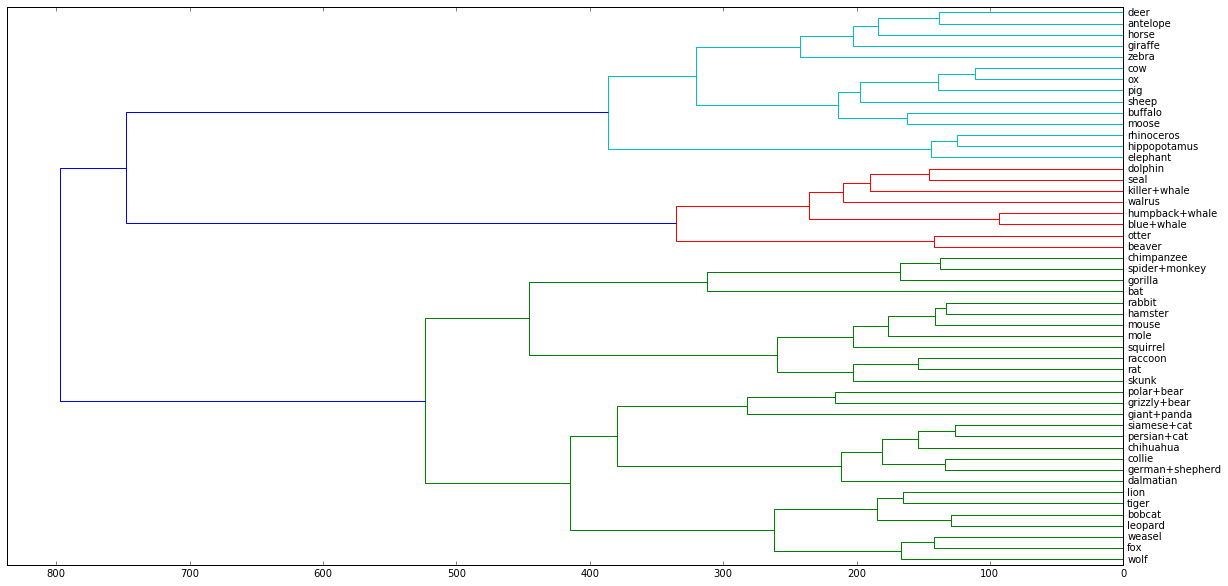

In [15]:
# z is the cluster linkage array (contains the hierarchical clustering information)
z = linkage(samples_features, method='ward');

dendrogram(z, orientation="right", labels=classes)
rcParams['figure.figsize']=[20,15]

<h2 align="center"> The clustering seems sensible to me since it 10 clusters before was arbitrary plus it seems to have made intuitive sense in grouping polar and grizzly bears together, different types of dog, and various sea dwelling creatures together. </h2>